# Working with data in Python

## Miguel Ángel Canela, IESE Business School

******

### NumPy arrays

In Mathematics, a **vector** is a sequence of numbers, and a **matrix** is a rectangular display of numbers. Operations with vectors and matrices are the subject of a branch of mathematics called linear algebra. In Python (and in many other languages), vectors are called one-dimensional **arrays**, while matrices are called two-dimensional arrays. Arrays of more than two dimensions can be managed in Python without pain.

Python arrays are not necessarily numeric. Indeed, vectors of dates and strings appear frequently in machine learning code. Nevertheless, all the elements of an array must have the same type, so that the array itself can have a type. Arrays were already implemented in plain Python, but the functionality of the Python arrays was enlarged in the **NumPy** library. NumPy was intended to be the fundamental library for scientific computing in Python. 

The Numpy package is called `numpy` in the Python catalog, and typically shortened to `np` in the code. To load NumPy, we input:

In [1]:
import numpy as np

Creating a numeric 1-dimensional array in NumPy is easy:

In [2]:
x = np.array(range(10))
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

String arrays are equally easy: 

In [3]:
y = np.array(['Messi', 'Neymar'])
y

array(['Messi', 'Neymar'], dtype='<U6')

The elements of a one-dimensional array can be extracted from a range or from a list. In a list, the elements can have different type, but, when creating the series, NumPy coerces them to a common type. A two-dimensional array is easily created from a list of lists. The entries are declared row-by-row:

In [4]:
z = np.array([[0, 7, 2, 3], [3, 9, -5, 1]])
z

array([[ 0,  7,  2,  3],
       [ 3,  9, -5,  1]])

The dimensions of an array are collected in the attribute `shape`:

In [5]:
z.shape

(2, 4)

NumPy incorporates **vectorized** forms of the mathematical functions of the package `math`, and many statistical functions, such as `mean`, `max` and `sum`. For instance:

In [6]:
np.sqrt(x)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [7]:
np.sum(x)

45

Note that the shape of `z` was not obtained with `np.shape(z)`. Indeed, NumPy looks at the shape as an **attribute** of the array, not as a function whose argument is the array. To the beginners, these subtleties, which do not exist in other languages like R, are a source of confusion. Do not think much about them and go ahead. 

Subsetting a 1-dimensional array is done as in a list:

In [8]:
x[:3]

array([0, 1, 2])

The same applies to 2-dimensional arrays, but we need two indexes within the square brackets. With the first index we specify the rows selected, and with the second index the columns.

In [9]:
z[:1, 1:]

array([[7, 2, 3]])

### Plotting with Matplotlib

At the turn of this century, a commercial application called **MATLAB** was the leader in scientific computing. At that time, two packages were built on top of NumPy to allow Pyton users to leave aside MATLAB: SciPy and Matplotlib. While **SciPy** is a library of mathematical and statistical methods, **Matplotlib** takes care of the graphical methods.

Matplotlib, used by many data scientists for visualization, has an impressive range of methods, including image processing. In this course, the use of Matplotlib is restricted to some methods of a module called `pyplot`, for plotting histograms, scatter plots and similar views of data. This module is typically loaded as follows:

In [10]:
import matplotlib.pyplot as plt

Everything can be customized in Matplotlib, but, in this course, it is used only for small jobs, so my presentation is very brief. An example follows, showing how to use `pyplot` for plotting curves.

In [11]:
x = np.linspace(0, 2, 100)

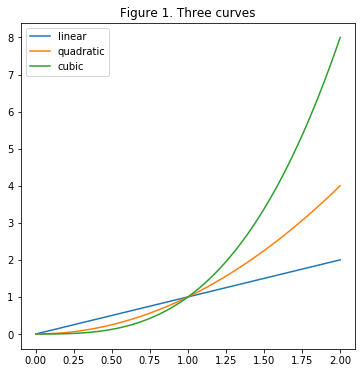

In [20]:
plt.figure(figsize=(6,6))
plt.title('Figure 1. Three curves')
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')
plt.legend()
plt.show()

Take care of running these lines of code together, from `plt.figure` to `plt.show`. Then, Figure 1 will appear below the code. By replacing the last line by `plt.savefig(fname)`, we save the figure, instead of printing it on the screen. The extension of the file name (e.g. `.pdf`) determines the format in which the figure is saved. Mind that, if you do not specify a complete path for the new file, Python will put it in the default folder (e.g. `Home` in Mac computers). If you work in a Jupyter notebook, the figure is exported to the folder where the notebook is. The argument `figsize=(6,6)` was set so that the figure looks fine in this document. 

The last line, `plt.show()`, is typically a source of confusion. What Python does, strictly speaking, is to create an object which can be passed to a graphics application. This is the role of this last line of code. In the old Python console, this additional step was needed for the plot top appear on the screen. Currently, the graphics app is integrated in the Jupyter apps (in both the console and the notebook), so `plt.show()` is not needed (as far as I know). 

*Note*. It is recommended in many places to write `%matplotlib inline` on top of the code to skip `plt.show()`, but my feeling is that this is obsolete.


### Pandas series and data frames

In **Pandas**, , whose name is typically shortened to `pd`, data sets are managed as objects called `data frames`. Data frames were born with R, but have been adopted by other languages like Python and Scala. In Python, data frames were introduced in Pandas.

In [13]:
import pandas as pd

In Pandas, an individual data vector is called a **series**. A data frame is formed by one or several series of the same length, which are presented as **columns**. The columns can have different type, but must have the same length. The data used in this course are imported from external data files, so we do not have to create the series by ourselves. Nevertheless, they can be created directly, for instance from a range, with the function `pd.Series`:

In [14]:
s = pd.Series(range(10))
s

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

Instead of a range, a list or a vector can be used to specify the data points. In a list, the elements can have different type, but, as NumPy, Pandas coerces them to a common type, as shown in the following example.

In [15]:
s1 = pd.Series([1, 5, 'Messi'])
s1

0        1
1        5
2    Messi
dtype: object

The **index** of a series is a vector-like object that contains the names of the terms of the series. The index is printed on the left, as you can see in the preceding output. Since the index of `s1` was not specified when I created the series, Pandas used consecutive integers as indexes.

The index is extracted as an attribute:

In [16]:
s1.index

RangeIndex(start=0, stop=3, step=1)

Indexes are generated automatically when Python creates the series, but we can also specify them directly:

In [17]:
s1.index = np.array(['a', 'b', 'c'])
s1

a        1
b        5
c    Messi
dtype: object

A Pandas data frame can be built in a similar way, with one or several vector-like objects of the same length, as in:

In [18]:
df = pd.DataFrame({'v1': range(0, 5),
    'v2': ['a', 'b', 'c', 'd', 'e'],
    'v3': np.repeat(-1.3, 5)})
df

,v1,v2,v3
0,0,a,-1.3
1,1,b,-1.3
2,2,c,-1.3
3,3,d,-1.3
4,4,e,-1.3


*Note*. `print(df)` would have been given me an output like that of the console. 

All the series in a data frame share the index. Let me mention other attributes. For instance, to learn the type of every column, we use `dtypes`:

In [19]:
df.dtypes

v1      int64
v2     object
v3    float64
dtype: object

To learn the names of the columns, we use `columns`:

In [20]:
df.columns

Index(['v1', 'v2', 'v3'], dtype='object')

We transform the series or data frame into a NumPy array with the function `values`. Note that, contrary what we saw in NumPy, most functions are written in Pandas as if they are attributes:

In [21]:
df.values

array([[0, 'a', -1.3],
       [1, 'b', -1.3],
       [2, 'c', -1.3],
       [3, 'd', -1.3],
       [4, 'e', -1.3]], dtype=object)

Finally, data frames can be sorted by the values of any column with the function `sort_values`:

In [22]:
df.sort_values(by='v1', ascending=False)

,v1,v2,v3
4,4,e,-1.3
3,3,d,-1.3
2,2,c,-1.3
1,1,b,-1.3
0,0,a,-1.3


### Subsetting in Pandas

Compared to the simplicity with which subarrays are extracted in NumPy, Pandas offers multiple ways for subsetting series and data frames. Having so many options typically confounds Python beginners. I discuss the selection procedures only in data frames, which is what we deal with in real-life data analysis. First, suppose that we want to select a subset of complete columns. We can specify this with a list containing the names of those columns:

In [23]:
df[['v1', 'v2']]

,v1,v2
0,0,a
1,1,b
2,2,c
3,3,d
4,4,e


If we want only one column, we can use either `df['v1']` or `df[['v1']]`. A word of caution here: the first returns a series, while the second one returns a data frame containing a single series. For many purposes, both things may work in the same way, but it is better to take care. 

*Note*. You can also select a column as `df.v1`. This is shorter and simpler, although it is not recommended unless you are very careful with the names of the columns, because the same notation is used for other purposes.  

To select a collection of complete rows, we specify them as in lists and 1-dimensional arrays:

In [24]:
df[1:3]

,v1,v2,v3
1,1,b,-1.3
2,2,c,-1.3


Expressions can also be used for extracting rows from a data frame. If we put an expression within the brackets, only the rows in which the expression is true are returned:

In [25]:
expr =  df['v1'] > 2
df[expr]

,v1,v2,v3
3,3,d,-1.3
4,4,e,-1.3


Besides the simple methods used above, we have two additional ways to carry out the selection: by label or by position. The **selection by label** is performed by adding `.loc` after the name of the data frame. In the **selection by position**, we add `.iloc`.

Selection of rows by label is based on the index:

In [26]:
df.loc[1:2]

,v1,v2,v3
1,1,b,-1.3
2,2,c,-1.3


Note that, now, the numbers within the brackets do not refer to the positions of the row, but to their names, given by the index of the data frame, which is common to all its series. So, in this example, `df.loc[1:2]` is the same as `df[1:3]`. This is a source of confusion when the index of the data frame is not a prespecified series but the default series on integer numbers. The same subset can be specified, explicitly by position, as `df.iloc[1:3]`.

Suppose now that we want to select both rows and columns. By label:

In [27]:
df.loc[:2, :'v2']

,v1,v2
0,0,a
1,1,b
2,2,c


By position:

In [28]:
df.iloc[:3, :2]

,v1,v2
0,0,a
1,1,b
2,2,c


Finally, note that the intervals defined with the colon (:) notation include the right limit when we select by label, but not when we select by position. As a rule, check your selections, even if you do not include these checks in your code. Getting this right takes a bit of time.

*Note*. The terms slicing and dicing are used in many Python books to refer to what I call here subsetting.

### Importing and exporting data sets

Data sets in tabular form can be imported as Pandas data frames from many file formats. The data used in this course come in **CSV files**, which are text files which use the comma as the column separator. The CSV format is very popular, but it must be handled with care for string data. In CSV files, the names of the columns typically come in the first row, and every other row corresponds to an instance.

CSV files are imported to data frames with the Pandas function `read_csv`. The default of this function takes the first line of the file as the column names. The syntax is `dfname = pd.read_csv(fname)`. The name of the data frame is chosen by the user, and the name of the file has to contain the path of that file (either local or remote).

Since columns do not have a data type in CSV files, Python guesses from the content. By default, when all the entries in a column (except in the first row, which contains the column name) are numbers, that column is imported as numeric. If there is, at least, one entry which is not numeric, string type is assigned to that column by default. If the string data contained in a CSV file can contain special characters (such as ñ, or á), which can make trouble, I recommend you to include the argument `encoding='utf-8'`.

To export a data frame to a CSV file, we use the function `to_csv`. The syntax is `df.to_csv(fname)`. Again, the file name, supplied by the user, includes the path. As usual, if you do not specify a complete path for the new file, Python will put it in the default folder.

If Excel is installed in your computer, files with the extension CSV are associated to Excel (so, they have a special Excel icon). But, in some countries, the comma is replaced by a semicolon. These alternative CSV files are handled in Pandas with the additional argument `sep=';'`. Pandas can deal with Excel files, but this is not common, because storing data in Excel is very inefficient, which matters when your data sets get big.

### Exploring a data set

Pandas provides several methods for exploring a data set right after importing or transforming it. These methods are capital to data scientists, since they are constantly  checking whether their data frames contain what they are expected to contain. I give only a brief explanation here, since more detail is available in the examples of this course.

First, the method `shape` works as in NumPy, so we can check the **dimensions** (number of rows and columns) of a data frame. Also, the methods `head` and `tail` print the first and the last rows of a data frame, respectively. The default number of rows to be printed is 5, but you may pass a custom number. Note that the functions that admit arguments must be written with parentheses. Leaving the parenthesis empty means that you accept the defaults. This is a source of confusion for the beginners, although it is intended to make the methods more powerful.

In [29]:
df.head(2)

,v1,v2,v3
0,0,a,-1.3
1,1,b,-1.3


Also, the content of a data frame can be explored with the method `info`. It reports the dimensions and the type that we have in every column of the data frame.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
v1    5 non-null int64
v2    5 non-null object
v3    5 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 248.0+ bytes


The method `describe` produces a conventional statistical summary. String columns are omitted.

In [31]:
df.describe()

,v1,v3
count,5.000000,5.0
mean,2.000000,-1.3
std,1.581139,0.0
min,0.000000,-1.3
25%,1.000000,-1.3
50%,2.000000,-1.3
75%,3.000000,-1.3
max,4.000000,-1.3


### Missing values

Missing values are denoted by `NaN`, or `nan`, in Pandas. They do not exist in plain Python, since they only make sense in the context of data analysis. They were introduced in NumPy, so we have to manage them as `np.nan`. As an illustration, I replace below the top left term of the data frame `df` by a NaN value:

In [32]:
df.iloc[0, 0] = np.nan
df

,v1,v2,v3
0,NaN,a,-1.3
1,1.0,b,-1.3
2,2.0,c,-1.3
3,3.0,d,-1.3
4,4.0,e,-1.3


Note that the type of first column has now float type, since integer vectors cannot include nan values. Two useful methods for handling missing values are `isna` (use `isnull` if your Pandas version is older than 0.22) and `dropna`. They can be applied to both series and data frames.

The function `isna` returns Boolean values:

In [33]:
df.isna()

,v1,v2,v3
0,True,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


In [34]:
df.isna().sum()

v1    1
v2    0
v3    0
dtype: int64

The function `dropna` returns the same data frame minus the rows that contain at least one missing value. It is recommended to check the amount and the source of these nan values using this function.

In [35]:
df.dropna()

,v1,v2,v3
1,1.0,b,-1.3
2,2.0,c,-1.3
3,3.0,d,-1.3
4,4.0,e,-1.3


### Duplicates

The function `drop_duplicates` drops the duplicated entries (in a series) or the duplicated rows (in a data frame). The function `unique` does the same job as `drop_duplicates`, but only for series.

In [36]:
df['v3'].drop_duplicates()

0   -1.3
Name: v3, dtype: float64

In [37]:
df.drop_duplicates()

,v1,v2,v3
0,NaN,a,-1.3
1,1.0,b,-1.3
2,2.0,c,-1.3
3,3.0,d,-1.3
4,4.0,e,-1.3


The method `duplicated` returns a Boolean series indicating which entries (for a vector) or which rows (for a data frame) are duplicated. The default version checks duplicates top down, but, with the argument `keep='last'`, you can do it bottom up.

In [38]:
df['v3'].duplicated()

0    False
1     True
2     True
3     True
4     True
Name: v3, dtype: bool

In [39]:
df.duplicated()

0    False
1    False
2    False
3    False
4    False
dtype: bool

### Pivot tables

In exploratory analysis, we often use tables produced in the following two ways:

* The method `value_counts` returns a series with counts of the occurrences of every value of a series. It does not include the missing values.

* The function `pivot_table` creates one-way or two way pivot tables. It has four arguments: `value`, a column of a data frame that we wish to summarize by groups, `index`, the grouping variable(s) in the rows of the table, `columns`, the grouping variable in the columns of the table, and `aggfunc`, the function to be applied in the summary (the default is the mean).

These functions are better understood in their illustration in the examples.

### Plotting

We typically visualize the data with bar plots, histograms, scatter plots and line plots. They can be obtained either as functions of the module `matplotlib.pyplot` or as attributes: 

* `barplot` applies to a series, producing a **bar plot**. 

* `hist` also applies to a series, producing a **histogram**. 

* `plot` can be applied to one or several series, producing a **line plot**.

* `scatter` is used for **scatter plots**.

There are countless functions in `matplotlib.pyplot` which can used to specify graphical attributes.


### References

1. W McKinney (2017), *Python for Data Analysis --- Data Wrangling with Pandas, NumPy, and IPython*, O'Reilly.

2. W McKinney & PyData Development Team (2018), *pandas --- powerful data analysis toolkit*.

3. J VanderPlas (2017), *Python Data Science Handbook*, O'Reilly.